Step1 : Initial Setup and Dataset loading

In [4]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For association rules
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# For classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix)

# For clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


Load Dataset

In [5]:
# Load the dataset (adjust filename as needed)
df = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')

print("="*70)
print("DATASET LOADED SUCCESSFULLY!")
print("="*70)

# Display basic information
print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n" + "="*70)
print("🔍 First 5 Rows:")
print("="*70)
print(df.head())

print("\n" + "="*70)
print("📋 Column Names and Data Types:")
print("="*70)
print(df.dtypes)

print("\n" + "="*70)
print("📈 Dataset Info:")
print("="*70)
df.info()

DATASET LOADED SUCCESSFULLY!

📊 Dataset Shape: 250000 rows × 13 columns

🔍 First 5 Rows:
   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        46251  2020-09-08 09:38:32      Electronics             12         3   
1        46251  2022-03-05 12:56:35             Home            468         4   
2        46251  2022-05-23 18:18:01             Home            288         2   
3        46251  2020-11-12 13:13:29         Clothing            196         1   
4        13593  2020-11-27 17:55:11             Home            449         1   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                    740    Credit Card            37      0.0   
1                   2739         PayPal            37      0.0   
2                   3196         PayPal            37      0.0   
3                   3509         PayPal            37      0.0   
4                   3452    Credit Card            49      0.0   

         Customer Name  Age

Basic Statistics

In [6]:
print("="*70)
print("📊 Statistical Summary (Numerical Features):")
print("="*70)
print(df.describe())

print("\n" + "="*70)
print("📊 Statistical Summary (Categorical Features):")
print("="*70)
print(df.describe(include='object'))

# Check unique values for each column
print("\n" + "="*70)
print("🔢 Unique Values Count:")
print("="*70)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

📊 Statistical Summary (Numerical Features):
        Customer ID  Product Price       Quantity  Total Purchase Amount  \
count  250000.00000  250000.000000  250000.000000          250000.000000   
mean    25004.03624     254.659512       2.998896            2725.370732   
std     14428.27959     141.568577       1.414694            1442.933565   
min         1.00000      10.000000       1.000000             100.000000   
25%     12497.75000     132.000000       2.000000            1477.000000   
50%     25018.00000     255.000000       3.000000            2724.000000   
75%     37506.00000     377.000000       4.000000            3974.000000   
max     50000.00000     500.000000       5.000000            5350.000000   

        Customer Age        Returns            Age          Churn  
count  250000.000000  202404.000000  250000.000000  250000.000000  
mean       43.940528       0.497861      43.940528       0.199496  
std        15.350246       0.499997      15.350246       0.399622  

Step 2: Data Preprocessing

🔍 Checking for Missing Values:
    Column  Missing_Count  Percentage
8  Returns          47596     19.0384


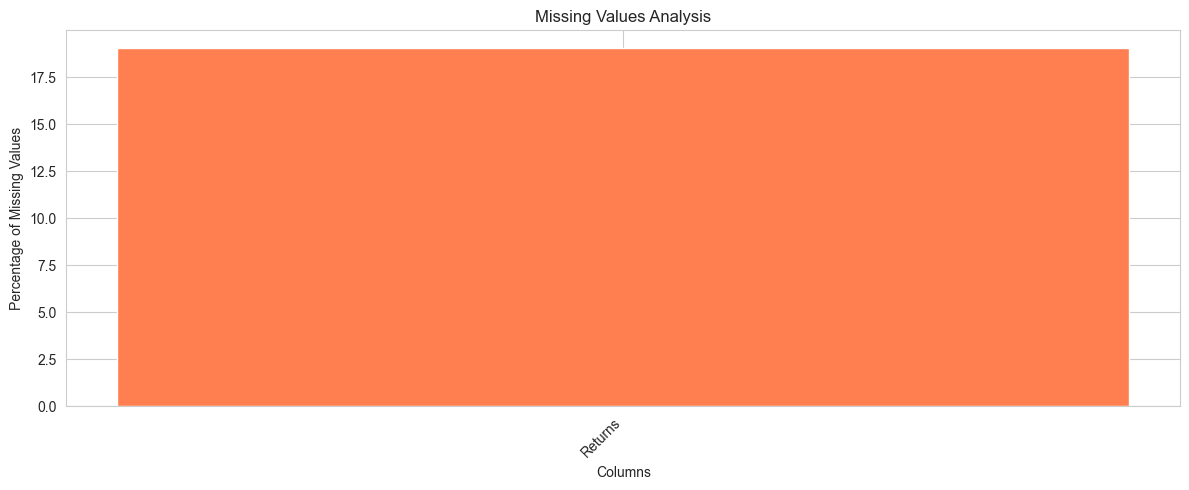

In [7]:
# Check for missing values
print("="*70)
print("🔍 Checking for Missing Values:")
print("="*70)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(12, 5))
    plt.bar(missing_df['Column'], missing_df['Percentage'], color='coral')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.title('Missing Values Analysis')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values found in the dataset!")

Handle Missing Values if any found

In [8]:
# If there are missing values, handle them
# For numerical columns: fill with median
# For categorical columns: fill with mode

df_clean = df.copy()

# Example handling (adjust based on your actual missing values):
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['int64', 'float64']:
            # Fill numerical with median
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
            print(f"✓ Filled {col} with median")
        else:
            # Fill categorical with mode
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
            print(f"✓ Filled {col} with mode")

print("\n✓ Missing values handled successfully!")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

✓ Filled Returns with median

✓ Missing values handled successfully!
Remaining missing values: 0


Check for duplicates

In [9]:
print("="*70)
print("🔍 Checking for Duplicate Rows:")
print("="*70)

duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df_clean = df_clean.drop_duplicates()
    print("✓ Duplicates removed!")
else:
    print("✓ No duplicate rows found!")

print(f"\nFinal dataset shape: {df_clean.shape}")

🔍 Checking for Duplicate Rows:
Number of duplicate rows: 0
✓ No duplicate rows found!

Final dataset shape: (250000, 13)


Feature Engineering and Encoding

In [10]:
# Create a copy for preprocessing
df_processed = df_clean.copy()

# Identify categorical and numerical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("="*70)
print("📊 Feature Types:")
print("="*70)
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Label Encoding for categorical variables
label_encoders = {}

for col in categorical_cols:
    if col != 'Customer_ID' and col != 'CustomerID':  # Don't encode ID columns
        le = LabelEncoder()
        df_processed[f'{col}_Encoded'] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"✓ Encoded {col}")

print("\n✓ Feature encoding completed!")
print(f"New shape: {df_processed.shape}")

📊 Feature Types:
Categorical columns (5): ['Purchase Date', 'Product Category', 'Payment Method', 'Customer Name', 'Gender']
Numerical columns (8): ['Customer ID', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', 'Returns', 'Age', 'Churn']
✓ Encoded Purchase Date
✓ Encoded Product Category
✓ Encoded Payment Method
✓ Encoded Customer Name
✓ Encoded Gender

✓ Feature encoding completed!
New shape: (250000, 18)


Exploratory Data Analysis(EDA)

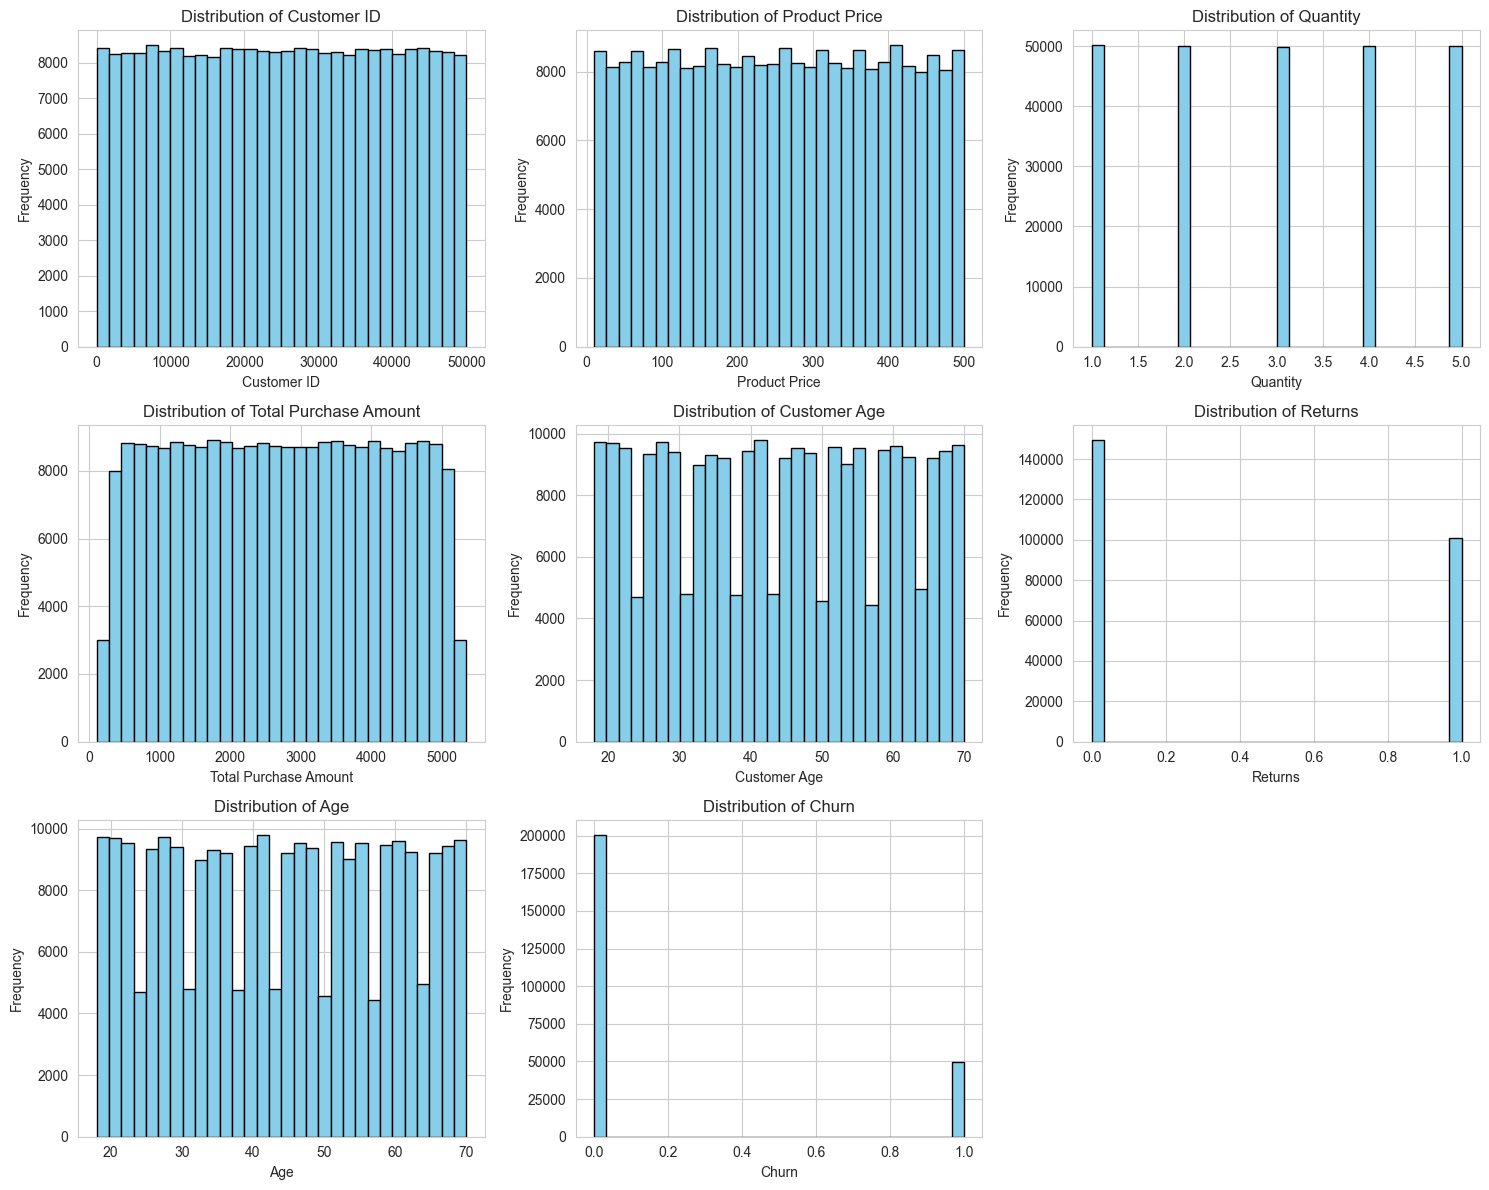

In [11]:
# Plot distributions of numerical features
numerical_cols_to_plot = [col for col in numerical_cols if col not in ['Customer_ID', 'CustomerID']]

fig, axes = plt.subplots(nrows=(len(numerical_cols_to_plot)+2)//3, ncols=3, figsize=(15, 4*((len(numerical_cols_to_plot)+2)//3)))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols_to_plot):
    axes[idx].hist(df_processed[col], bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Remove extra subplots
for idx in range(len(numerical_cols_to_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

Box plots for Outlier Detection

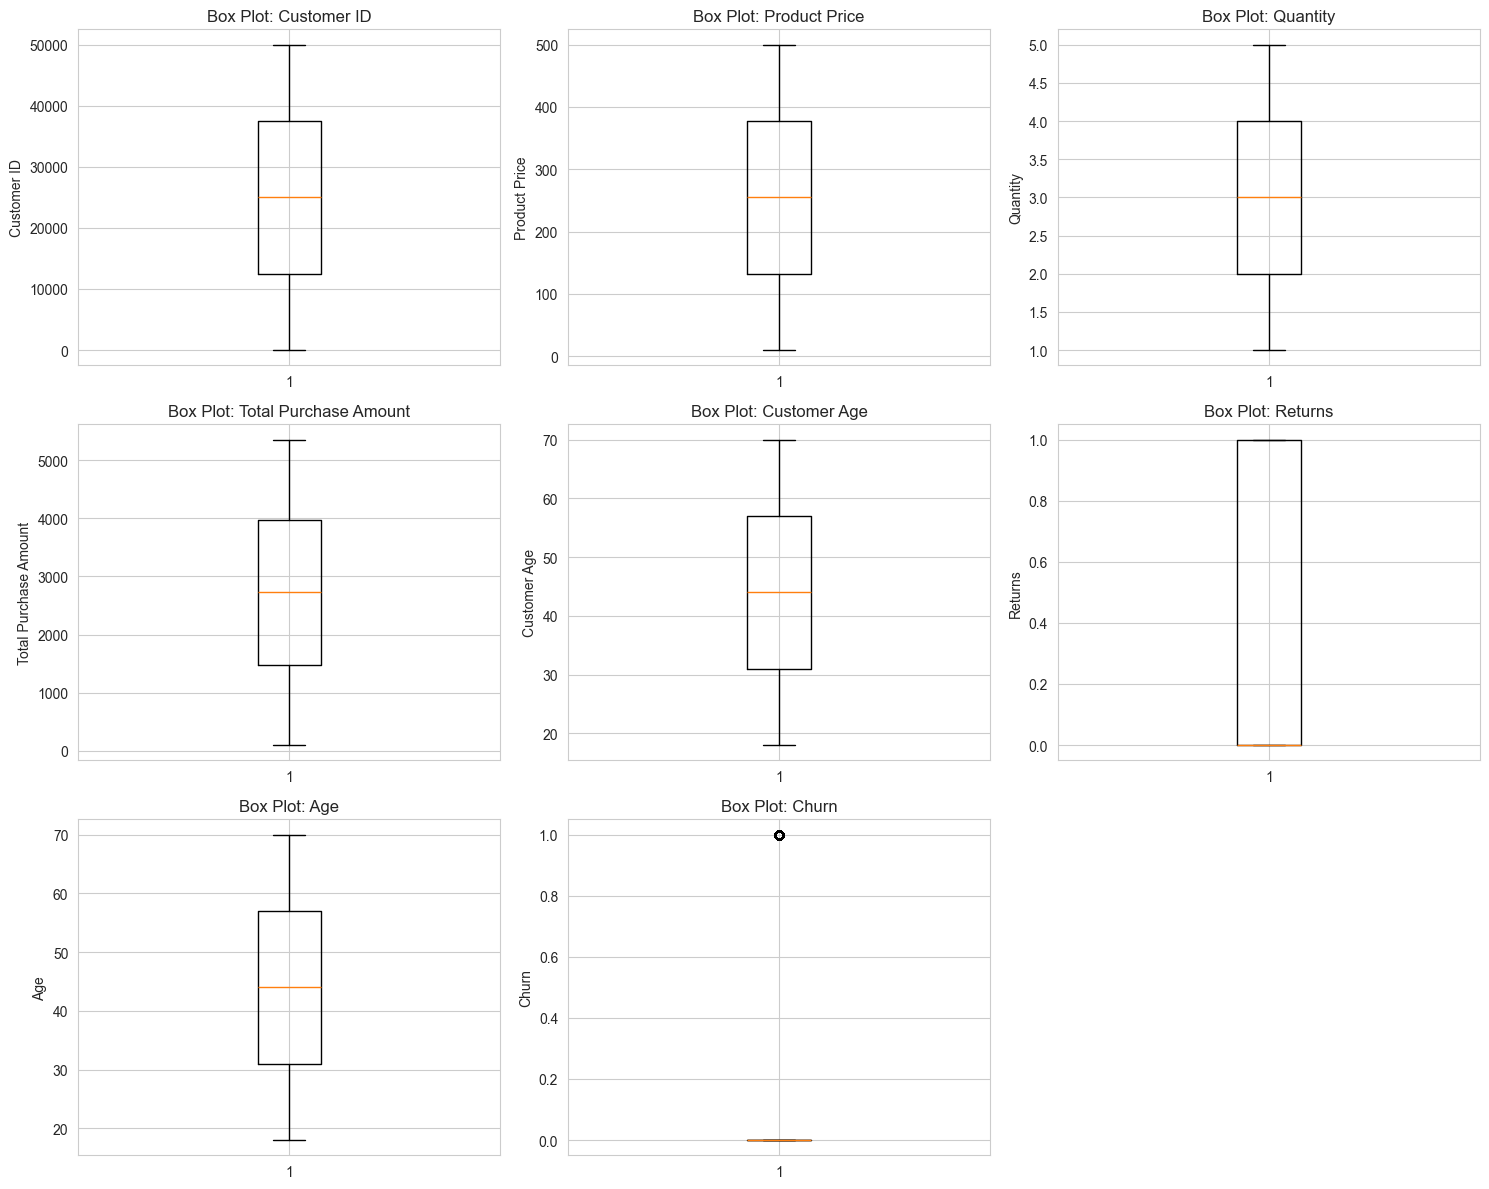

In [12]:
# Box plots for numerical features
fig, axes = plt.subplots(nrows=(len(numerical_cols_to_plot)+2)//3, ncols=3, figsize=(15, 4*((len(numerical_cols_to_plot)+2)//3)))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols_to_plot):
    axes[idx].boxplot(df_processed[col].dropna())
    axes[idx].set_title(f'Box Plot: {col}')
    axes[idx].set_ylabel(col)

# Remove extra subplots
for idx in range(len(numerical_cols_to_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

Categorical Feature Analysis

In [ ]:
# Count plots for categorical features
categorical_cols_to_plot = [col for col in categorical_cols if col not in ['Customer_ID', 'CustomerID']]

fig, axes = plt.subplots(nrows=(len(categorical_cols_to_plot)+2)//3, ncols=3, figsize=(15, 4*((len(categorical_cols_to_plot)+2)//3)))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols_to_plot):
    value_counts = df_processed[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='coral')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')

# Remove extra subplots
for idx in range(len(categorical_cols_to_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

Correlation Heatmap

In [ ]:
# Select only numerical columns for correlation
numeric_data = df_processed.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show top correlations
print("="*70)
print("🔥 Top 10 Strongest Correlations:")
print("="*70)
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove self-correlations
top_corr = corr_pairs.abs().sort_values(ascending=False).head(10)
print(top_corr)